<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/14_explainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 287 (delta 32), reused 11 (delta 7), pack-reused 213
Receiving objects: 100% (287/287), 36.54 MiB | 9.49 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Updating files: 100% (48/48), done.
/content/SRU-deeplearning-workshop/SRU-deeplearning-workshop


In [2]:
! pip install --q tf_explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tf_explain.core.grad_cam import GradCAM
from keras.applications.vgg16 import preprocess_input, decode_predictions

# Load pretrained model or your own
'''
default include_top = True
whether or not to include the fully connected layer at the top of the network.
True > the fully connected layer, which is trained on ImageNet's 1000 classes, will be included,
meaning that the output of the model will be a probability distribution over the 1000 ImageNet classes.
Classification

False > the fully connected layer will be excluded, and the output of the model
will be the output of the last convolutional layer, which can be used as a
feature extractor for another task or a part of another neural network.
'''
model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)

553467096/553467096 [==============================] - 16s 0us/step


In [4]:
print(model.input_shape)

(None, 224, 224, 3)


In [22]:
# Load a sample image (or multiple ones)
img = tf.keras.preprocessing.image.load_img("./image/cat1.jpg", target_size=(224, 224))
print(type(img))
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
# (#sample*224*224*3)
data = ([np.copy(img)],None)

<class 'PIL.Image.Image'>
(224, 224, 3)


In [15]:
def inference(x):
    # sample *224 *224 *3
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    prob = np.max(preds[0])
    c = np.argmax(preds[0])
    print(prob, c)
    return decode_predictions(preds, top=1)

In [16]:
inference(img)

1/1 [==============================] - 1s 1s/step
0.88079447 285


[[('n02124075', 'Egyptian_cat', 0.88079447)]]

In [21]:
# Start explainer
explainer = GradCAM()
grid = explainer.explain(data, model, class_index=285)

#explainer.save(grid, ".", "grad_cam.png")

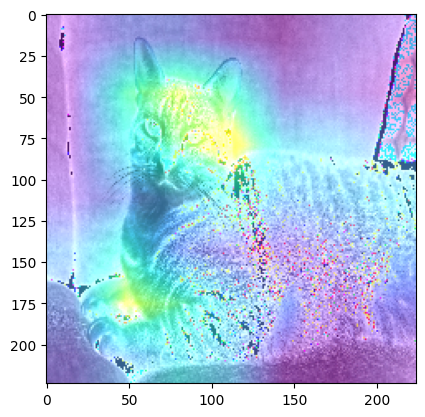

In [23]:
plt.imshow(grid)